## Visualize results NARMAX experiments

In [1]:
using Revise
using JLD
using MAT
using Statistics
using StatsPlots
using LaTeXStrings
using Plots
pyplot();

In [2]:
include("visualization.jl");

In [3]:
alpha = 0.1
linewidth = 2;
styles = [:solid, :dash, :dot, :dashdot];

### Experiment

In [4]:
NR = 100

# NT = [500,1000,2000,4000]
NT = 2 .^collect(8:12)
NE = length(NT)

deg = 3
order = 10

results_sim_FEM = zeros(NE,2)
results_prd_FEM = zeros(NE,2)
results_sim_RLS = zeros(NE,2)
results_prd_RLS = zeros(NE,2)
results_sim_ILS = zeros(NE,2)
results_prd_ILS = zeros(NE,2)
avg_FE = zeros(NE,2)
fin_FE = zeros(NE,2)

RMS_sim_FEM = zeros(NR,NE)
RMS_prd_FEM = zeros(NR,NE)
RMS_sim_RLS = zeros(NR,NE)
RMS_prd_RLS = zeros(NR,NE)
RMS_sim_ILS = zeros(NR,NE)
RMS_prd_ILS = zeros(NR,NE)
avg_FE_r = zeros(NR,NE)
fin_FE_r = zeros(NR,NE)

for r = 1:NR

    # Load
    FEM_data = load("results/results-NARMAX_FEM_M"*string(order)*"_degree"*string(deg)*"_r"*string(r)*".jld")
    RMS_prd_FEM[r,:] = FEM_data["RMS_prd"][1:NE]
    RMS_sim_FEM[r,:] = FEM_data["RMS_sim"][1:NE]
    avg_FE_r[r,:] = FEM_data["avg_FE"][1:NE]
    fin_FE_r[r,:] = FEM_data["fin_FE"][1:NE]

    RLS_data = load("results/results-NARMAX_RLS_M"*string(order)*"_degree"*string(deg)*"_r"*string(r)*".jld")
    RMS_prd_RLS[r,:] = RLS_data["RMS_prd"][1:NE]
    RMS_sim_RLS[r,:] = RLS_data["RMS_sim"][1:NE]

    ILS_data = matread("results/results-NARMAX_ILS_M"*string(order)*"_degree"*string(deg)*"_r"*string(r)*".mat")
    RMS_prd_ILS[r,:] = ILS_data["RMS_prd"][1:NE]
    RMS_sim_ILS[r,:] = ILS_data["RMS_sim"][1:NE]

end    
    
# Check for proportion of instable
instab_sim_FEM = mean(isnan.(RMS_sim_FEM),dims=1)
instab_prd_FEM = mean(isnan.(RMS_prd_FEM),dims=1)
instab_sim_RLS = mean(isnan.(RMS_sim_RLS),dims=1)
instab_prd_RLS = mean(isnan.(RMS_prd_RLS),dims=1)
instab_sim_ILS = mean(isnan.(RMS_sim_ILS),dims=1)
instab_prd_ILS = mean(isnan.(RMS_prd_ILS),dims=1)

# Populate RMS array
trim_prctile = 0.05
for n = 1:NE
    results_sim_FEM[n,1] = tmean(filter(!isnan, RMS_sim_FEM[:,n]), tr=trim_prctile)
    results_sim_FEM[n,2] = trimse(filter(!isnan, RMS_sim_FEM[:,n]), tr=trim_prctile)
    results_prd_FEM[n,1] = tmean(filter(!isnan, RMS_prd_FEM[:,n]), tr=trim_prctile)
    results_prd_FEM[n,2] = trimse(filter(!isnan, RMS_prd_FEM[:,n]), tr=trim_prctile)

    results_sim_RLS[n,1] = tmean(filter(!isnan, RMS_sim_RLS[:,n]), tr=trim_prctile)
    results_sim_RLS[n,2] = trimse(filter(!isnan, RMS_sim_RLS[:,n]), tr=trim_prctile)
    results_prd_RLS[n,1] = tmean(filter(!isnan, RMS_prd_RLS[:,n]), tr=trim_prctile)
    results_prd_RLS[n,2] = trimse(filter(!isnan, RMS_prd_RLS[:,n]), tr=trim_prctile)

    results_sim_ILS[n,1] = tmean(filter(!isnan, RMS_sim_ILS[:,n]), tr=trim_prctile)
#     results_sim_ILS[n,2] = trimse(filter(!isnan, RMS_sim_ILS[:,n]), tr=trim_prctile)
    results_prd_ILS[n,1] = tmean(filter(!isnan, RMS_prd_ILS[:,n]), tr=trim_prctile)
#     results_prd_ILS[n,2] = trimse(filter(!isnan, RMS_prd_ILS[:,n]), tr=trim_prctile)
    
    avg_FE[n,1] = tmean(filter(!isnan, avg_FE_r[:,n]), tr=trim_prctile)
    avg_FE[n,2] = trimse(filter(!isnan, avg_FE_r[:,n]), tr=trim_prctile)
    fin_FE[n,1] = tmean(filter(!isnan, fin_FE_r[:,n]), tr=trim_prctile)
    fin_FE[n,2] = trimse(filter(!isnan, fin_FE_r[:,n]), tr=trim_prctile)
end

#### Simulation

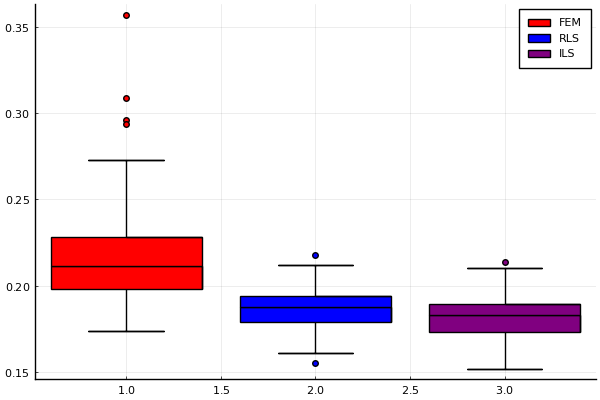

In [5]:
n = 4
boxplot(filter(!isnan, RMS_sim_FEM[:,n]), color="red", label="FEM")
boxplot!(filter(!isnan, RMS_sim_RLS[:,n]), color="blue", label="RLS")
boxplot!(filter(!isnan, RMS_sim_ILS[:,n]), color="purple", label="ILS")

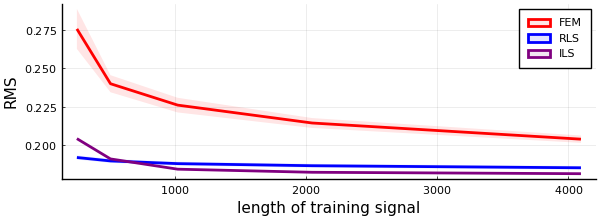

In [6]:
p6 = plot(NT, results_sim_FEM[:,1], 
          ribbon=[results_sim_FEM[:,2] results_sim_FEM[:,2]], 
          color="red", 
          label="FEM", 
#           xscale=:log10,
#           yscale=:log10,
#           ylims=[0.08, 0.15],
          linewidth=linewidth,
          fillalpha=alpha,
#           title="Simulation error",
          xlabel="length of training signal",
          ylabel="RMS",
          size=(600,220))
plot!(NT, results_sim_RLS[:,1], 
     ribbon=[results_sim_RLS[:,2] results_sim_RLS[:,2]], 
     color="blue", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="RLS")
plot!(NT, results_sim_ILS[:,1], 
     ribbon=[results_sim_ILS[:,2] results_sim_ILS[:,2]], 
     color="purple", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="ILS")

In [7]:
savefig(p6, "figures/NARMAX-RMS-sim_deg"*string(deg)*"_order"*string(order)*".png")

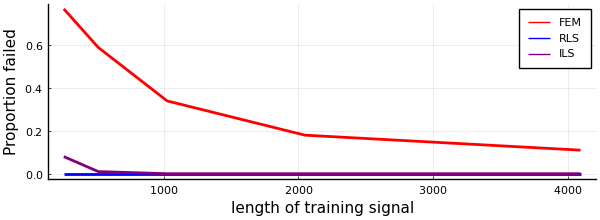

In [8]:
p111 = plot(NT, instab_sim_FEM', color="red", label="FEM", linewidth=2, ylabel="Proportion failed", xlabel="length of training signal", size=(600,220))
plot!(NT, instab_sim_RLS', color="blue", label="RLS", linewidth=2)#, ylims=[0., 1.])
plot!(NT, instab_sim_ILS', color="purple", label="ILS", linewidth=2)

In [9]:
savefig(p111, "figures/NARMAX-propfail-sim_deg"*string(deg)*"_order"*string(order)*".png")

#### 1-step ahead predictions

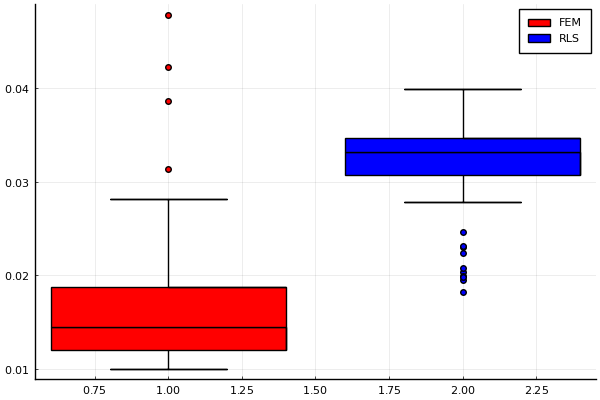

In [10]:
n = 4
boxplot(filter(!isnan, RMS_prd_FEM[:,n]), color="red", label="FEM")
boxplot!(filter(!isnan, RMS_prd_RLS[:,n]), color="blue", label="RLS")
# boxplot!(filter(!isnan, RMS_prd_ILS[:,n]), color="purple", label="ILS")

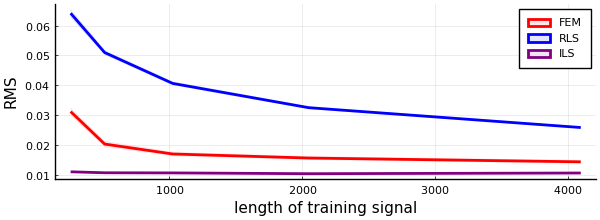

In [11]:
p7 = plot(NT, results_prd_FEM[:,1], 
          ribbon=[results_prd_FEM[:,2] results_prd_FEM[:,2]], 
          color="red", 
          label="FEM", 
#           xscale=:log10,
#           yscale=:log1enumerate(0,
#           ylims=[0.10, 0.25],
          linewidth=linewidth,
          fillalpha=alpha,
          xlabel="length of training signal",
          ylabel="RMS",
          size=(600,220))
plot!(NT, results_prd_RLS[:,1], 
     ribbon=[results_prd_RLS[:,2] results_prd_RLS[:,2]], 
     color="blue", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="RLS")
plot!(NT, results_prd_ILS[:,1], 
     ribbon=[results_prd_ILS[:,2] results_prd_ILS[:,2]], 
     color="purple", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="ILS")

In [12]:
savefig(p7, "figures/NARMAX-RMS-prd_deg"*string(deg)*"_order"*string(order)*".png")

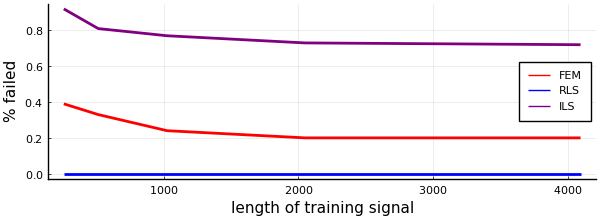

In [13]:
p121 = plot(NT, instab_prd_FEM', color="red", label="FEM", linewidth=2, ylabel="% failed", xlabel="length of training signal", size=(600,220))
plot!(NT, instab_prd_RLS', color="blue", label="RLS", linewidth=2)#, ylims=[0., 1.])
plot!(NT, instab_prd_ILS', color="purple", label="ILS", linewidth=2)

In [14]:
savefig(p121, "figures/NARMAX-propfail-prd_deg"*string(deg)*"_order"*string(order)*".png")

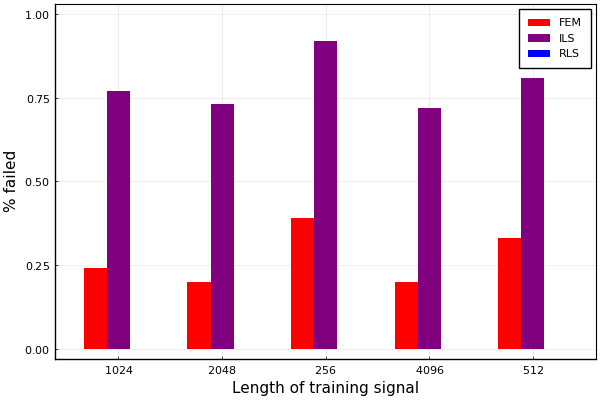

In [15]:
instab_prd = [instab_prd_FEM;
              instab_prd_RLS;
              instab_prd_ILS]

ctg = repeat(["FEM", "RLS", "ILS"], inner = NE)
nam = repeat(string.(NT), outer=3)
colours = repeat(["red", "blue", "purple"], inner = NE)

groupedbar(nam, instab_prd', group = ctg, color = colours, xlabel = "Length of training signal", ylabel = "% failed", bar_width = 0.67,
        lw = 0, framestyle = :box, ylims=[0., 1.], bar_position = :dodge)

#### Free energies

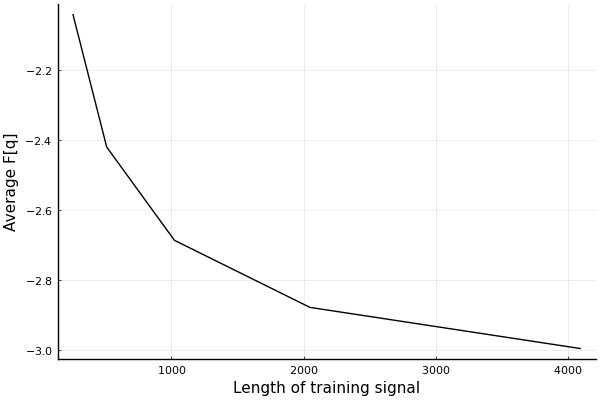

In [16]:
plot(NT, avg_FE[:,1], color="black", xlabel="Length of training signal", ylabel="Average F[q]", label="")